In [2]:
from google.colab import files
files.upload()

Saving 0_100.jpg to 0_100.jpg
Saving 1_100.jpg to 1_100.jpg
Saving 2_100.jpg to 2_100.jpg
Saving 3_100.jpg to 3_100.jpg
Saving 4_100.jpg to 4_100.jpg
Saving 5_100.jpg to 5_100.jpg
Saving 6_100.jpg to 6_100.jpg
Saving 7_100.jpg to 7_100.jpg
Saving 8_100.jpg to 8_100.jpg
Saving 11_100.jpg to 11_100.jpg
Saving 12_100.jpg to 12_100.jpg
Saving 13_100.jpg to 13_100.jpg
Saving 16_100.jpg to 16_100.jpg
Saving 17_100.jpg to 17_100.jpg
Saving 18_100.jpg to 18_100.jpg
Saving 24_100.jpg to 24_100.jpg
Saving 25_100.jpg to 25_100.jpg
Saving 26_100.jpg to 26_100.jpg
Saving 27_100.jpg to 27_100.jpg
Saving 28_100.jpg to 28_100.jpg
Saving 72_100.jpg to 72_100.jpg
Saving 134_100.jpg to 134_100.jpg
Saving 136_100.jpg to 136_100.jpg
Saving 137_100.jpg to 137_100.jpg
Saving 138_100.jpg to 138_100.jpg
Saving 165_100.jpg to 165_100.jpg
Saving 166_100.jpg to 166_100.jpg
Saving 167_100.jpg to 167_100.jpg
Saving 168_100.jpg to 168_100.jpg
Saving 169_100.jpg to 169_100.jpg
Saving 170_100.jpg to 170_100.jpg
Saving

{'0_100.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00d\x00d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\

In [0]:
!ls

In [3]:
from skimage.measure import compare_ssim as ssim        #used for determining the structural similarity b/w two images
import matplotlib.pyplot as plt            #used for plotting of images             
import matplotlib.image as mpimg           #used to read and display the image
import os                                  #used to communicate with the system
import cv2                                 #used to read and display images in formats that have been specified
import numpy as np                         #used for mathematical operations
import tensorflow as tf                  
from keras.models import Model             #module to implement neural networks
from keras.layers import Conv2D,Input,UpSampling2D 
from google.colab import files
from google.colab import drive
img_paths=[]

Using TensorFlow backend.


In [0]:
#run this to call import files from local drive
def import_pics():
  drive.mount('/pics_color')
  uploaded = files.upload()
  !ls
  os.getcwd()
  items = os.listdir('/content')
  for each_image in items:
    if each_image.endswith(".jpg"):
      full_path = "/content/" + each_image
      image = cv2.imread(full_path)

In [0]:
def img_pro():
  items = os.listdir('/content')           #this is where the images are stored
  #img_paths
  print(items)             
  for each_image in items:
    if each_image.endswith(".jpg"):       #searches specifically for all pictures in a directory
      full_path = "/content/" + each_image
      img_paths.append(full_path)
      print(full_path)                   #appends the path in which the images are stored to a list
      
  pross_img=[]  
  original=mpimg.imread(img_paths[0])
  grey=[]
  for full_path in img_paths:
    img=mpimg.imread(full_path)
    img = cv2.resize(img,dsize=(256,256))        #downsizes the image to 256 by 256 for uniformity in training to apply 
    img=np.array(img)                            #the make model
    with tf.Session() as sess:
      t_img = tf.convert_to_tensor((1.0/255)*img, np.float32)      
      yuv_img = tf.image.rgb_to_yuv(t_img)          #working in the yuv color model
      imgnp = np.array(sess.run(yuv_img))          #converts the image to an array 
      pross_img.append(imgnp)                      
  return np.array(pross_img) 


In [0]:
#converts the image back to rgb color model from the yuv color model

def yuv2rgb(img):                              
  with tf.Session() as sess:
    t_img = tf.convert_to_tensor(img,np.float32)
    rgb_img = tf.image.yuv_to_rgb(t_img)
    imgnp = np.array(sess.run(rgb_img))
    imgnp *= 255
    imgnp = imgnp.astype(np.uint8)
    return imgnp

In [0]:
def split_set(pross_img,per):
  print(pross_img.shape)
  x_train = pross_img[:int(per*len(pross_img))+1,:,:,:1]         #deals with luminosity (intensity) of grayscale (y portion of the yuv colour model)
  y_train = pross_img[:int(per*len(pross_img))+1,:,:,1:]         #deals with the chromacity (coloured portion) (uv portion of the colour model)
  x_test = pross_img[int(per*len(pross_img))+1:,:,:,:1]          #some data has been used to for training and others for testing
  y_test = pross_img[int(per*len(pross_img))+1:,:,:,1:]
  '''print(x_train[0].shape)
  print(len(x_train))
  for i in range(len(x_train)):
    x_train[i] = np.reshape(x_train[i],(256,256,1))
    y_train[i] = np.reshape(y_train[i],(256,256,2))
  for i in range(len(x_test)):
    x_test[i] = np.reshape(x_test[i],(256,256,1))
    y_test[i] = np.reshape(y_test[i],(256,256,2))'''
  
  
  return x_train,y_train,x_test,y_test

In [0]:
#our neural network model
def make_model():
  
  X_input = Input((256,256,1))
  X = Conv2D(64,(3,3),activation="relu",padding="same")(X_input)
  X = Conv2D(64,(3,3),activation="relu",padding="same",strides=2)(X)
  X = Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(X)
  X = Conv2D(256, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)(X)
  X = Conv2D(512, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(256, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X = UpSampling2D((2, 2))(X)
  X = Conv2D(64, (3, 3), activation='relu', padding='same')(X)
  X = UpSampling2D((2, 2))(X)
  X = Conv2D(32, (3, 3), activation='relu', padding='same')(X)
  X = Conv2D(2, (3, 3), activation='tanh', padding='same')(X)
  result = UpSampling2D((2, 2))(X)
  
  model = Model(inputs=[X_input],outputs=[result])
  
  
  return model


In [9]:


pross_img = img_pro()
model = make_model()
model.compile(loss="mse",optimizer="rmsprop",metrics=["accuracy"]) 
x_train,y_train,x_test,y_test = split_set(pross_img,1)
print(x_train.shape)
model.fit(x_train, y_train, epochs=500)
#loss_and_metrics = model.evaluate(x_test, y_test)'''

['.config', 'r_154_100.jpg', '186_100.jpg', '227_100.jpg', '11_100.jpg', 'r_144_100.jpg', '173_100.jpg', '308_100.jpg', '5_100.jpg', '13_100.jpg', '306_100.jpg', '231_100.jpg', 'r_268_100.jpg', 'r_13_100.jpg', 'r_153_100.jpg', '4_100.jpg', '317_100.jpg', 'r_151_100.jpg', '165_100.jpg', 'r_174_100.jpg', 'r_282_100.jpg', 'r_288_100.jpg', 'r_274_100.jpg', '170_100.jpg', '28_100.jpg', 'r_319_100.jpg', 'r_284_100.jpg', '174_100.jpg', '304_100.jpg', '179_100.jpg', '17_100.jpg', 'r_271_100.jpg', 'r_311_100.jpg', '315_100.jpg', 'r_163_100.jpg', 'r_272_100.jpg', '295_100.jpg', '294_100.jpg', '8_100.jpg', 'r_175_100.jpg', '16_100.jpg', '303_100.jpg', '299_100.jpg', '311_100.jpg', 'r_9_100.jpg', '297_100.jpg', '305_100.jpg', '168_100.jpg', 'r_179_100.jpg', '228_100.jpg', 'r_280_100.jpg', '171_100.jpg', '166_100.jpg', '7_100.jpg', 'r_149_100.jpg', '138_100.jpg', '26_100.jpg', 'r_321_100.jpg', 'r_162_100.jpg', '1_100.jpg', 'r_8_100.jpg', 'r_150_100.jpg', '316_100.jpg', 'r_281_100.jpg', 'r_159_100.j

KeyboardInterrupt: ignored

(256, 256, 3)


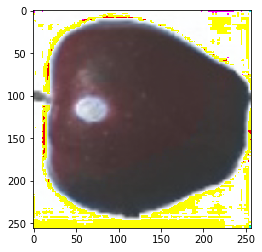

In [10]:
z=0
result = model.predict(x_train[z:z+1])
#img = np.concatenate((x_train[0,:,:,:],result[0,:,:,:]),axis=2)
img = np.zeros((256,256,3))
img[:,:,0] = x_train[z][:,:,0]
img[:,:,1:] = result[0]
print(img.shape)
img = yuv2rgb(img)
#img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#img= cv2.cvtColor (img,cv2.COLOR_BGR2GRAY)
#img = (255-img)
plt.imshow(img)



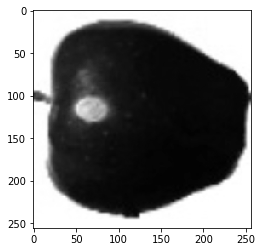

In [11]:
plt.imshow(x_train[z][:,:,0],cmap="gray")

In [0]:
def compare_images(imageA, imageB, title):
	s = ssim(imageA, imageB,multichannel=True)
 
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("SSIM: %.2f" % (s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageB)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageA)
	plt.axis("off")
 
	# show the images
	plt.show()

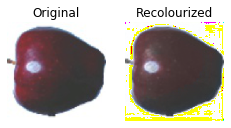

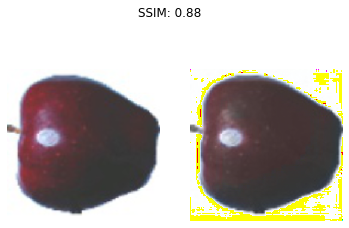

(256, 256, 3)


In [18]:
original=mpimg.imread(img_paths[z])
original = cv2.resize(original,dsize=(256,256))
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Recolourized", img)
 
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image)
	plt.axis("off")
 
# show the figure
plt.show()
original=mpimg.imread(img_paths[z])
original = cv2.resize(original,dsize=(256,256))
img = cv2.resize(img,dsize=(256,256))
compare_images(img,original, "Original vs. Recolourized")
print(original.shape)

In [19]:
type(original)

numpy.ndarray